In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib

%matplotlib inline

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [3]:
def pbil(F, I, N, LEN, p1, p2, p3):
    EVAL = np.zeros(N)
    bests = np.zeros(I)
    mids = np.zeros(I)
    lows = np.zeros(I)
    best_one = np.zeros((I, LEN))
    probs = np.zeros((I, LEN))
    p = np.full(LEN, 0.5)
    for iteration in log_progress(range(I)):
        P = np.random.uniform(0, 1, (N, LEN)) < p
        EVAL = np.apply_along_axis(F, 1, P)
        probs[iteration] = p.copy()
        
        # best selection
        x = P[np.argmax(EVAL), :]
        p = p * (1 - p1) + x * p1
        
        # random mutation
        mut_prob = np.random.uniform(0,1, LEN)
        mut = p * (1-p3) + (np.random.uniform(0, 1, LEN) < np.repeat(0.5, LEN)) * p3
        p -= p * (mut_prob < p2)
        p += (mut_prob < p2) * (mut)
        
        bests[iteration] = EVAL.max()
        mids[iteration] = EVAL.mean()
        lows[iteration] = EVAL.min()
        best_one[iteration] = x
    return {'best':bests, 'mid':mids, 'low':lows, 'probs':probs, 'best_one':best_one}

## OneMax

In [4]:
GENOME_LENGTH = 200
ITERATIONS = 500
POPULATION_SIZE = 1000
def OneMax(ind):
    return ind.sum()

In [5]:
res = pbil(OneMax, ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.2, 0.05, 0.02)

('iteration nr:', 0, 'time:', 0.03815007209777832)
('iteration nr:', 10, 'time:', 0.16054010391235352)
('iteration nr:', 20, 'time:', 0.2818479537963867)
('iteration nr:', 30, 'time:', 0.4007110595703125)
('iteration nr:', 40, 'time:', 0.5217080116271973)
('iteration nr:', 50, 'time:', 0.642402172088623)
('iteration nr:', 60, 'time:', 0.7624871730804443)
('iteration nr:', 70, 'time:', 0.8815281391143799)
('iteration nr:', 80, 'time:', 1.0028941631317139)
('iteration nr:', 90, 'time:', 1.1231069564819336)
('iteration nr:', 100, 'time:', 1.2440011501312256)
('iteration nr:', 110, 'time:', 1.3624560832977295)
('iteration nr:', 120, 'time:', 1.4813320636749268)
('iteration nr:', 130, 'time:', 1.601315975189209)
('iteration nr:', 140, 'time:', 1.7209930419921875)
('iteration nr:', 150, 'time:', 1.8421461582183838)
('iteration nr:', 160, 'time:', 1.968153953552246)
('iteration nr:', 170, 'time:', 2.089966058731079)
('iteration nr:', 180, 'time:', 2.2144100666046143)
('iteration nr:', 190, 't

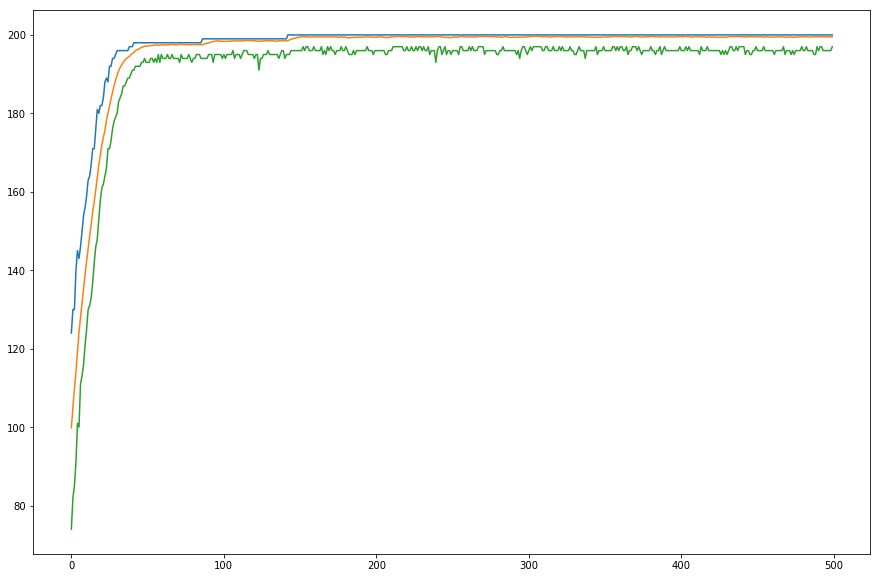

In [6]:
plt.figure(figsize=(15,10))
plt.plot(res['best'])
plt.plot(res['mid'])
plt.plot(res['low'])
plt.show()

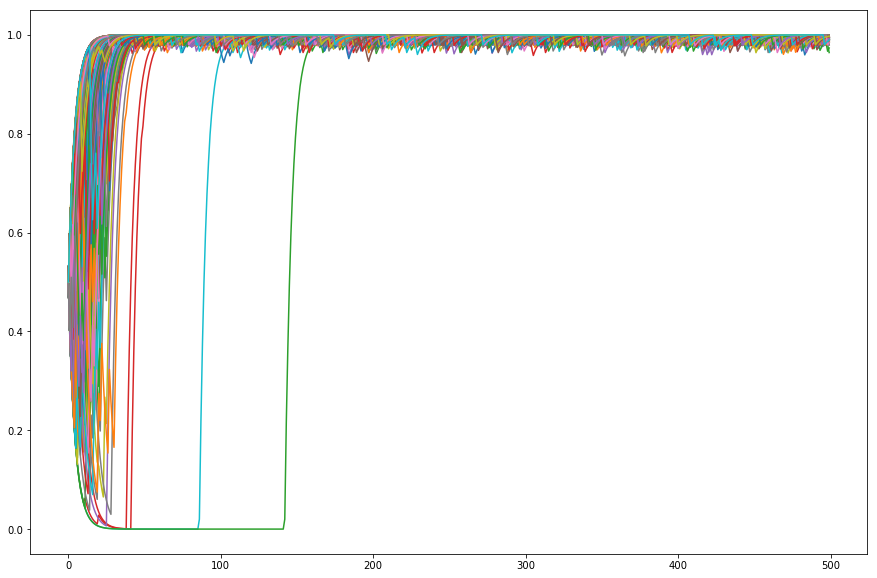

In [7]:
plt.figure(figsize=(15,10))
plt.plot(res['probs'])
plt.show()

## Deceptive OneMax

In [8]:
def deceptive_onemax(ind):
    r = OneMax(ind)
    return ind.shape[0] + 1 if (r == 0) else r

In [9]:
deceptive_res = pbil(deceptive_onemax, ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.2, 0.05, 0.02)

('iteration nr:', 0, 'time:', 0.03595995903015137)
('iteration nr:', 10, 'time:', 0.16014981269836426)
('iteration nr:', 20, 'time:', 0.2879908084869385)
('iteration nr:', 30, 'time:', 0.4115719795227051)
('iteration nr:', 40, 'time:', 0.5369739532470703)
('iteration nr:', 50, 'time:', 0.6606309413909912)
('iteration nr:', 60, 'time:', 0.7855279445648193)
('iteration nr:', 70, 'time:', 0.9091107845306396)
('iteration nr:', 80, 'time:', 1.034364938735962)
('iteration nr:', 90, 'time:', 1.1590228080749512)
('iteration nr:', 100, 'time:', 1.2845737934112549)
('iteration nr:', 110, 'time:', 1.407027006149292)
('iteration nr:', 120, 'time:', 1.5321969985961914)
('iteration nr:', 130, 'time:', 1.6545360088348389)
('iteration nr:', 140, 'time:', 1.779770851135254)
('iteration nr:', 150, 'time:', 1.9035699367523193)
('iteration nr:', 160, 'time:', 2.0272059440612793)
('iteration nr:', 170, 'time:', 2.1512529850006104)
('iteration nr:', 180, 'time:', 2.276455879211426)
('iteration nr:', 190, 't

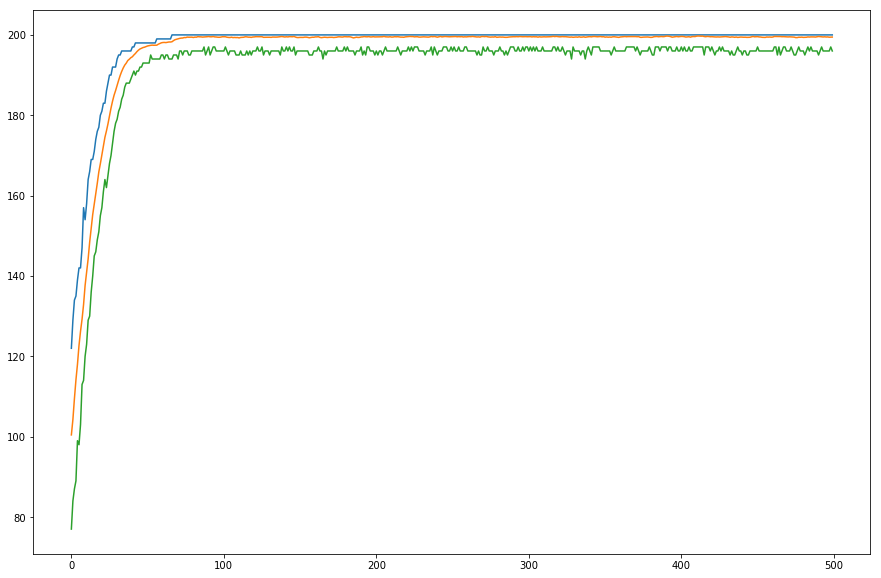

In [10]:
plt.figure(figsize=(15,10))
plt.plot(deceptive_res['best'])
plt.plot(deceptive_res['mid'])
plt.plot(deceptive_res['low'])
plt.show()

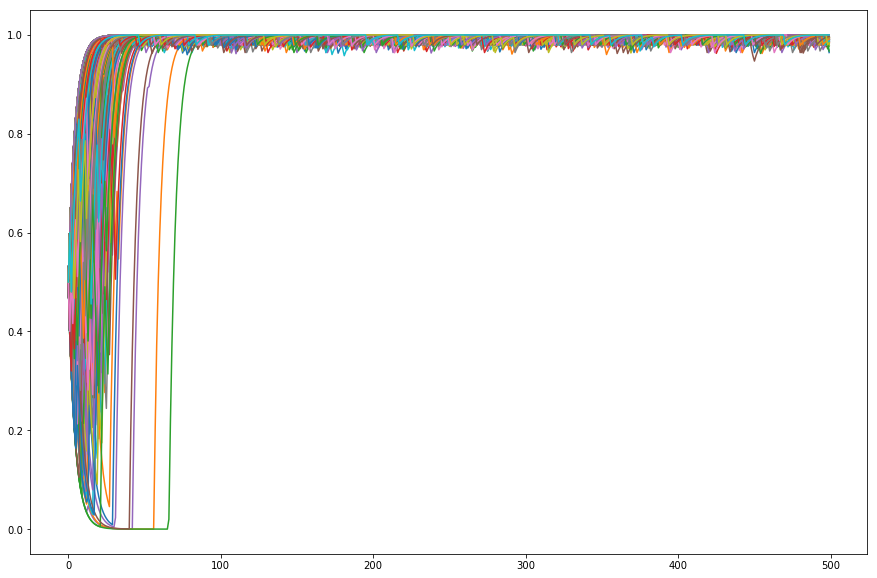

In [11]:
plt.figure(figsize=(15,10))
plt.plot(deceptive_res['probs'])
plt.show()

## 5-deceptive OneMax

In [13]:
def k_deceptive_onemax(k):
    def fn(ind):
        return np.sum(np.apply_along_axis(deceptive_onemax, 1, np.reshape(ind, (ind.shape[0]//k,k))))
    return fn

In [14]:
k_deceptive_res = pbil(k_deceptive_onemax(5), ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.2, 0.05, 0.02)

('iteration nr:', 0, 'time:', 0.42989397048950195)
('iteration nr:', 10, 'time:', 4.236361980438232)
('iteration nr:', 20, 'time:', 8.053622007369995)
('iteration nr:', 30, 'time:', 11.895411968231201)
('iteration nr:', 40, 'time:', 15.742502927780151)
('iteration nr:', 50, 'time:', 19.58702301979065)
('iteration nr:', 60, 'time:', 23.433295011520386)
('iteration nr:', 70, 'time:', 27.284193992614746)
('iteration nr:', 80, 'time:', 31.130307912826538)
('iteration nr:', 90, 'time:', 34.972383975982666)
('iteration nr:', 100, 'time:', 38.82613706588745)
('iteration nr:', 110, 'time:', 42.693932056427)
('iteration nr:', 120, 'time:', 46.54893898963928)
('iteration nr:', 130, 'time:', 50.377856969833374)
('iteration nr:', 140, 'time:', 54.205815076828)
('iteration nr:', 150, 'time:', 58.038042068481445)
('iteration nr:', 160, 'time:', 61.88315010070801)
('iteration nr:', 170, 'time:', 65.71423697471619)
('iteration nr:', 180, 'time:', 69.55530190467834)
('iteration nr:', 190, 'time:', 73.3

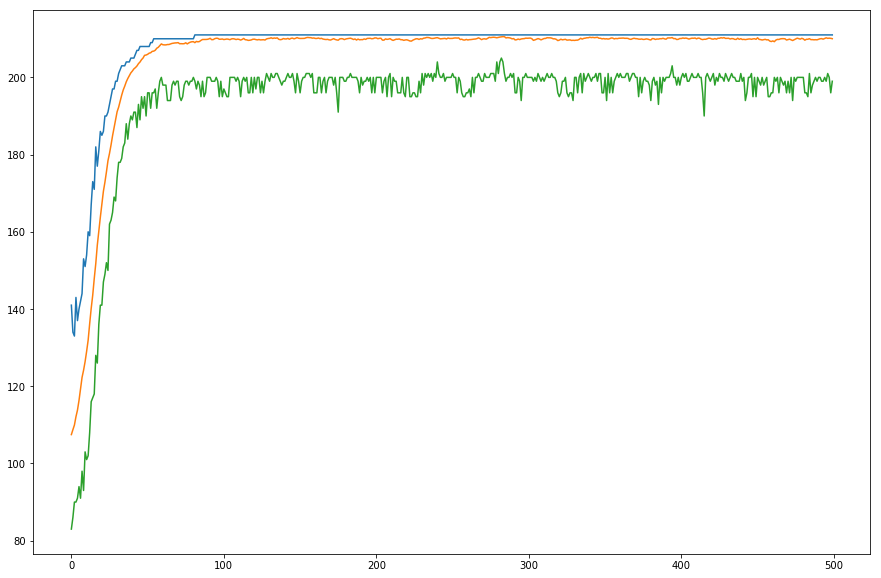

In [15]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['best'])
plt.plot(k_deceptive_res['mid'])
plt.plot(k_deceptive_res['low'])
plt.show()

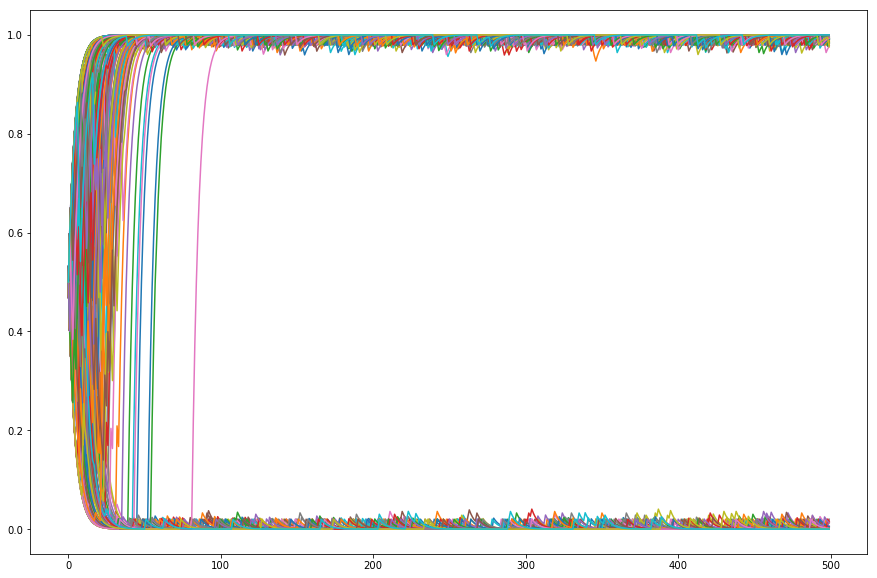

In [16]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['probs'])
plt.show()

## 10-deceptiveOneMax

In [17]:
k_deceptive_res = pbil(k_deceptive_onemax(10), ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.2, 0.05, 0.02)

('iteration nr:', 0, 'time:', 0.24282097816467285)
('iteration nr:', 10, 'time:', 2.3133509159088135)
('iteration nr:', 20, 'time:', 4.375571966171265)
('iteration nr:', 30, 'time:', 6.438831090927124)
('iteration nr:', 40, 'time:', 8.495628118515015)
('iteration nr:', 50, 'time:', 10.544421911239624)
('iteration nr:', 60, 'time:', 12.604170083999634)
('iteration nr:', 70, 'time:', 14.666476964950562)
('iteration nr:', 80, 'time:', 16.71783208847046)
('iteration nr:', 90, 'time:', 18.768901109695435)
('iteration nr:', 100, 'time:', 20.834540128707886)
('iteration nr:', 110, 'time:', 22.88402009010315)
('iteration nr:', 120, 'time:', 24.941070079803467)
('iteration nr:', 130, 'time:', 27.00174593925476)
('iteration nr:', 140, 'time:', 29.059170961380005)
('iteration nr:', 150, 'time:', 31.116223096847534)
('iteration nr:', 160, 'time:', 33.17228102684021)
('iteration nr:', 170, 'time:', 35.22940111160278)
('iteration nr:', 180, 'time:', 37.282877922058105)
('iteration nr:', 190, 'time:'

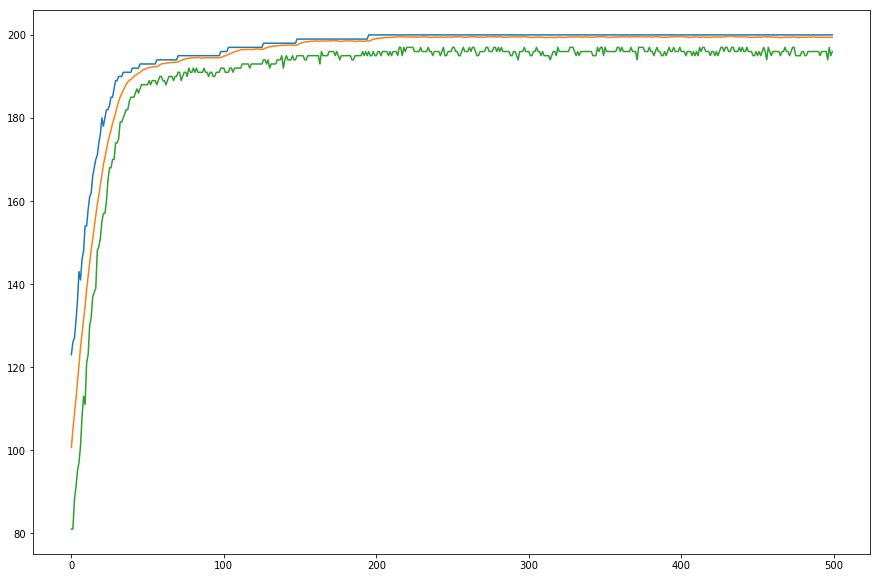

In [18]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['best'])
plt.plot(k_deceptive_res['mid'])
plt.plot(k_deceptive_res['low'])
plt.show()

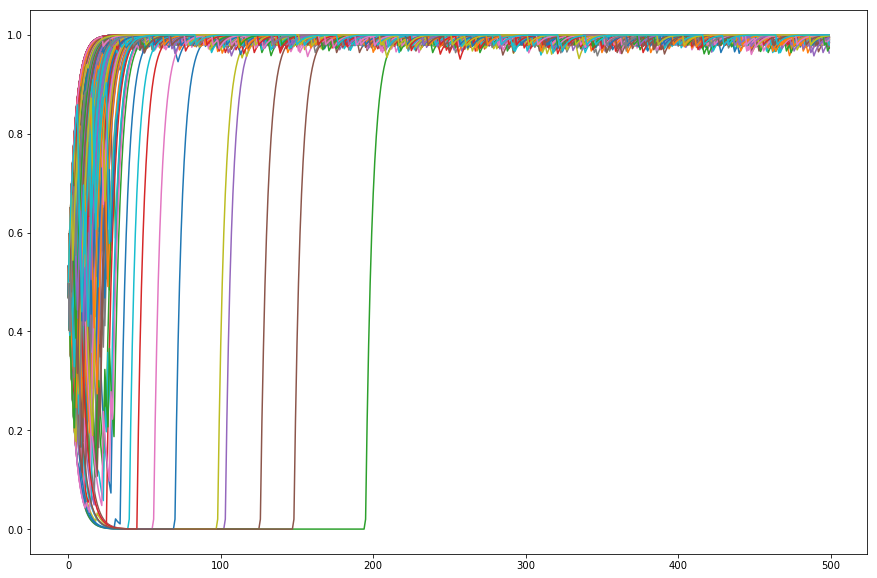

In [19]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['probs'])
plt.show()

## 20-deceptiveOneMax

In [20]:
k_deceptive_res = pbil(k_deceptive_onemax(20), ITERATIONS, POPULATION_SIZE, GENOME_LENGTH, 0.2, 0.05, 0.02)

('iteration nr:', 0, 'time:', 0.1580948829650879)
('iteration nr:', 10, 'time:', 1.3786139488220215)
('iteration nr:', 20, 'time:', 2.596827983856201)
('iteration nr:', 30, 'time:', 3.813206911087036)
('iteration nr:', 40, 'time:', 5.026758909225464)
('iteration nr:', 50, 'time:', 6.240978956222534)
('iteration nr:', 60, 'time:', 7.459896802902222)
('iteration nr:', 70, 'time:', 8.684700012207031)
('iteration nr:', 80, 'time:', 9.899026870727539)
('iteration nr:', 90, 'time:', 11.124708890914917)
('iteration nr:', 100, 'time:', 12.340329885482788)
('iteration nr:', 110, 'time:', 13.559553861618042)
('iteration nr:', 120, 'time:', 14.777787923812866)
('iteration nr:', 130, 'time:', 15.994596004486084)
('iteration nr:', 140, 'time:', 17.21206283569336)
('iteration nr:', 150, 'time:', 18.42712903022766)
('iteration nr:', 160, 'time:', 19.644119024276733)
('iteration nr:', 170, 'time:', 20.859871864318848)
('iteration nr:', 180, 'time:', 22.075387954711914)
('iteration nr:', 190, 'time:', 

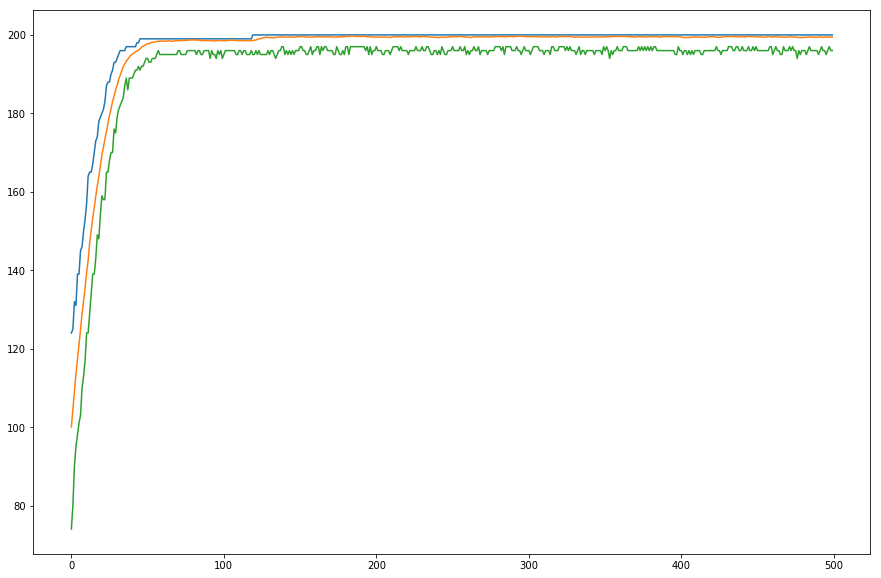

In [21]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['best'])
plt.plot(k_deceptive_res['mid'])
plt.plot(k_deceptive_res['low'])
plt.show()

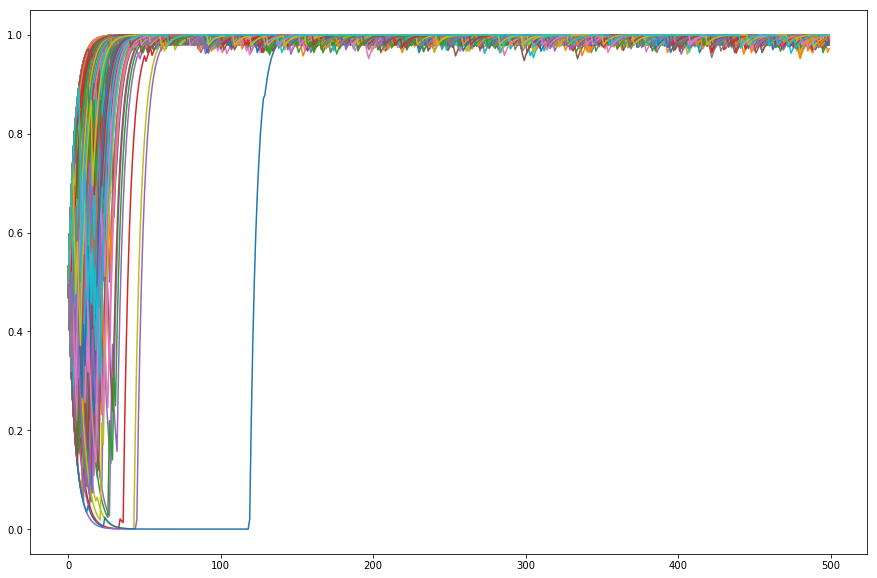

In [22]:
plt.figure(figsize=(15,10))
plt.plot(k_deceptive_res['probs'])
plt.show()